In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from scipy.stats import gaussian_kde
import ast


dataset=pd.read_csv('../Data/all_combined.csv')
# import dataset in format
# Subject, chooce ,receivor, Wait2.RT, targettxt ,gender ,age ,As ,Ao
# subID,list, list ,list ,list, bool ,float ,float ,float

# Load the .npz file
data=[np.load(f'../MCMC_tests/samples_{i}.npz') for i in range(len(dataset))]


In [2]:
sub_to_index={}
for index in range( len(dataset)):
    sub=dataset['Subject'][index]
    sub_to_index[sub]=index

In [3]:

def P(u):
        return 1/(1+np.exp(-u))
    
def Fehr_Schmidt(alpha,responder):
    proposer=10-responder
    u = responder - alpha * (proposer - responder)
    return u

In [5]:
# perform grid search for alpha 
comlist_ture=[]
comlist_g=[]
for i in range(len(dataset)):
    index=i
    listt=[0]*5
    rs=ast.literal_eval(dataset['receivor'][index])[0:40] if ast.literal_eval(dataset['receivor'][index])[0] >= 0 else ast.literal_eval(dataset['receivor'][index])[40:]
    co=ast.literal_eval(dataset['choose'][index])[0:40] if ast.literal_eval(dataset['receivor'][index])[0] >= 0 else ast.literal_eval(dataset['choose'][index])[40:]

    for r,test in zip(np.array(rs),np.array(co)):
        if test == 1:
            Rece=r
            listt[int(Rece)-1]+=1/8
    
    all_ps=[None]*50
    for i in range(50):
        alpah=i*0.1
        us=[Fehr_Schmidt(alpah,r) for r in range(1,6)]
        ps=[P(u) for u in us]
        all_ps[i]=ps
    
    comlist_g.append(all_ps)
    comlist_ture.append(listt)

In [19]:
# perforn log liklighood on the results from grid search for alpha 

all_max_log=[]
for i in range(len(dataset)):
    index=i
    rs=ast.literal_eval(dataset['receivor'][index])[0:40] if ast.literal_eval(dataset['receivor'][index])[0] >= 0 else ast.literal_eval(dataset['receivor'][index])[40:]
    co=ast.literal_eval(dataset['choose'][index])[0:40] if ast.literal_eval(dataset['receivor'][index])[0] >= 0 else ast.literal_eval(dataset['choose'][index])[40:]
    all_logliklighod=[]
    subject_prop=comlist_g[index]
    for prop in subject_prop:
        logliklighod=0
        for r,test in zip(np.array(rs),np.array(co)):
            logliklighod+=np.log(prop[int(r)-1]*test + (1-prop[int(r)-1])*(1-test))
        all_logliklighod.append(logliklighod)
    max_log=np.argmax(all_logliklighod)*0.1
    all_max_log.append(max_log)

In [20]:

def mse(true,gues):
    mseval=0
    for t,g in zip(true,gues):
        mseval+=(t-g)**2
    return mseval

In [ ]:
# find MSE for all subject using their best alpha
mselist=[]
for i,(t,a) in enumerate(zip(comlist_ture,all_max_log)):
    g=comlist_g[i][int(a*10)]
    mselist.append(mse(t,g))

print(f'MSE for subject 0 = {mselist[0]}')


In [22]:
np.mean(f'mean mse = {mselist}')

0.1818050693138788

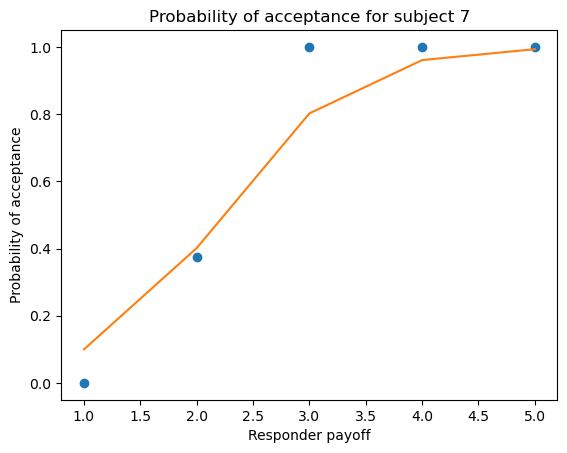

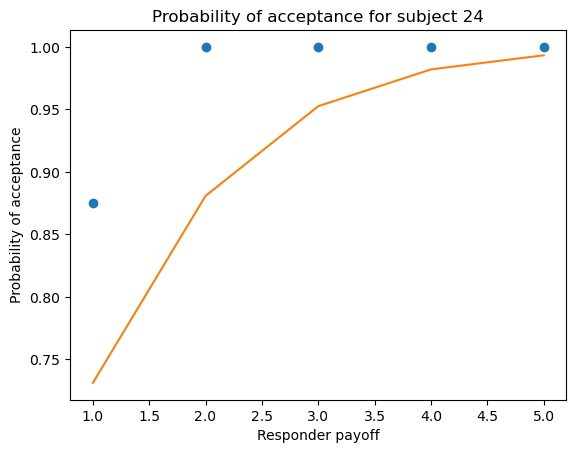

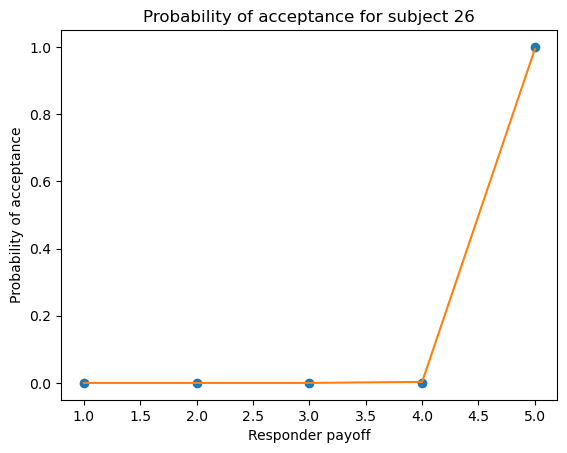

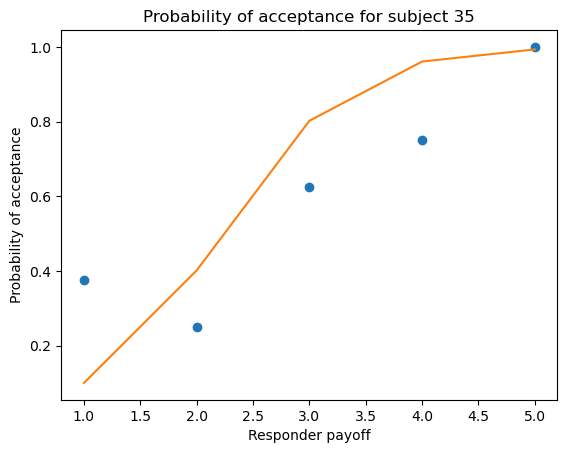

In [23]:
# Plot subjects in subjectlist
subjectlist=[sub_to_index[7],sub_to_index[24],sub_to_index[26],sub_to_index[35]]

for i in subjectlist:
    index=i

    listt=[0]*5
    rs=ast.literal_eval(dataset['receivor'][index])[0:40] if ast.literal_eval(dataset['receivor'][index])[0] >= 0 else ast.literal_eval(dataset['receivor'][index])[40:]
    co=ast.literal_eval(dataset['choose'][index])[0:40] if ast.literal_eval(dataset['receivor'][index])[0] >= 0 else ast.literal_eval(dataset['choose'][index])[40:]

    for r,test in zip(np.array(rs),np.array(co)):
        if test == 1:
            Rece=r
            listt[int(Rece)-1]+=1/8

    plt.plot([1,2,3,4,5],listt,'o')

    alpah=all_max_log[index]
    us=[Fehr_Schmidt(alpah,r) for r in range(1,6)]
    ps=[P(u) for u in us]
    plt.plot([1,2,3,4,5], ps)
    
    plt.xlabel('Responder payoff')
    plt.ylabel('Probability of acceptance')
    plt.title(f"Probability of acceptance for subject {dataset['Subject'][index]}")
    plt.show()


In [24]:
# mselist is a list that contaiens the MSE for eache subject (sub)
print(mselist[sub_to_index[7]])
print(mselist[sub_to_index[24]])
print(mselist[sub_to_index[26]])
print(mselist[sub_to_index[35]])
print(np.mean(mselist))

0.05135246135146558
0.03754598085357533
5.390509060777966e-05
0.17454773450414282
0.1818050693138788
